In [33]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

Loading Dataset

In [34]:
user_columns = ['user_id','gender', 'age',  'occupation', 'zip_code']
users = pd.read_csv('/content/sample_data/Untitled Folder/users.dat', sep='::', names=user_columns, encoding='latin-1')


rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('/content/sample_data/Untitled Folder/ratings.dat', sep='::', names=rating_columns, encoding='latin-1')


<ipython-input-34-f4b7178ba870>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('/content/sample_data/Untitled Folder/users.dat', sep='::', names=user_columns, encoding='latin-1')
<ipython-input-34-f4b7178ba870>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('/content/sample_data/Untitled Folder/ratings.dat', sep='::', names=rating_columns, encoding='latin-1')


Number of users by age in MovieLens 1M dataset.

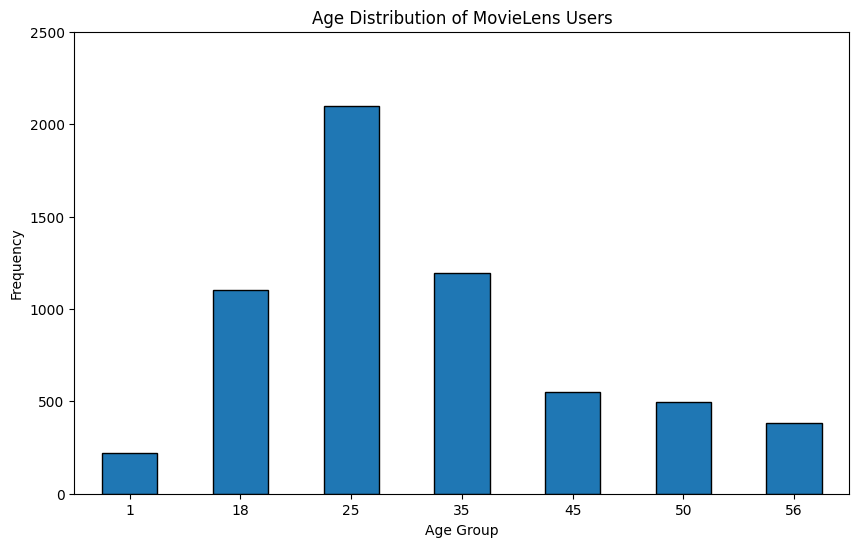

In [35]:
age_bins = [0, 17, 24, 34, 44, 49, 55, float('inf')]
age_labels = ['1', '18', '25', '35', '45', '50', '56']

users['age_group'] = pd.cut(users['age'], bins=age_bins, labels=age_labels, right=False)
age_distribution = users['age_group'].value_counts(sort=False)

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', edgecolor='black')
plt.title('Age Distribution of MovieLens Users')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.yticks(range(0, age_distribution.max() + 500, 500))
plt.grid(False)
plt.show()

Count of Male and Female Users

In [36]:
gender_counts = users['gender'].value_counts()

print("Number of male users:", gender_counts.get('M', 0))
print("Number of female users:", gender_counts.get('F', 0))

Number of male users: 4331
Number of female users: 1709


Average number of ratings by users of each age group

In [37]:
user_ratings = pd.merge(users, ratings, on='user_id')
age_group_ratings = (user_ratings.groupby('age_group').size() / users.groupby('age_group').size()).round(1)

average_ratings_df = age_group_ratings.reset_index()

table = tabulate(average_ratings_df, headers=['Age', 'Mean Number of votes'],tablefmt='orgtbl', showindex=False)
print(table)

|   Age |   Mean Number of votes |
|-------+------------------------|
|     1 |                  122.6 |
|    18 |                  166.4 |
|    25 |                  188.7 |
|    35 |                  166.8 |
|    45 |                  152.1 |
|    50 |                  146.1 |
|    56 |                  102.1 |


Proportion of data in MovieLens provided by each age group

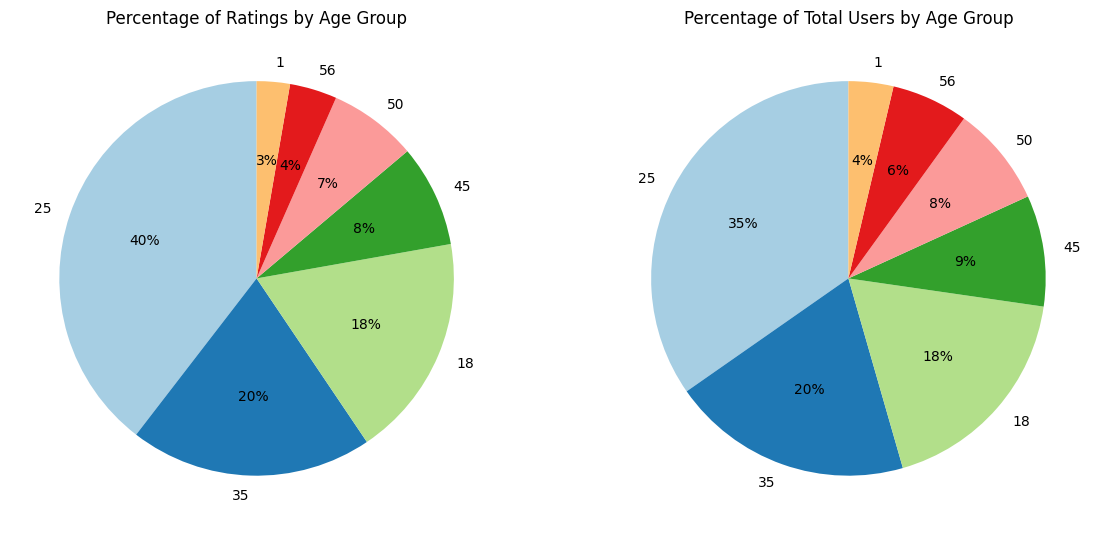

In [38]:
ratings_per_age_group = user_ratings['age_group'].value_counts(normalize=True) * 100
users_per_age_group = users['age_group'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for the proportion of ratings
axs[0].pie(ratings_per_age_group, labels=ratings_per_age_group.index, autopct='%1.0f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[0].set_title('Percentage of Ratings by Age Group')

# Pie chart for the percentage of total users

axs[1].pie(users_per_age_group, labels=users_per_age_group.index, autopct='%1.0f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[1].set_title('Percentage of Total Users by Age Group')

plt.show()

Mean number of votes by user's gender

In [39]:
gender_group_ratings = (user_ratings.groupby('gender').size() / users.groupby('gender').size()).round(1)

average_ratings_df1 = gender_group_ratings.reset_index()

table1 = tabulate(average_ratings_df1, headers=['Gender', 'Mean Number of votes'],tablefmt='orgtbl', showindex=False)
print(table1)

| Gender   |   Mean Number of votes |
|----------+------------------------|
| F        |                  144.2 |
| M        |                  174   |


User's rating behaviour of demographic groups. Age groups.


In [40]:

stats_by_age_group = user_ratings.groupby('age_group')['rating'].agg(['mean', 'std']).round(2)

stats_by_age_group


,mean,std
age_group,,
1,3.55,1.21
18,3.51,1.17
25,3.55,1.13
35,3.62,1.08
45,3.64,1.07
50,3.71,1.06
56,3.77,1.06


User's rating behaviour of demographic groups. Gender

In [41]:
stats_by_gender = user_ratings.groupby('gender')['rating'].agg(['mean', 'std']).round(2)

stats_by_gender

,mean,std
gender,,
F,3.62,1.11
M,3.57,1.12
